# **dPCR Results Analysis**


---


This notebook is the results analysis of phase one sequencing experiments: unspiked wastewater extracted TNA (OC43, N1, BCoV, and panEV)

---

Version: Aug 26, 2023)

Plate included: 2030_0822_2023, 2031_0822_2023, 2032_0822_2023, 2033_0822_2023 (All 26K 24 wells plates)

Compatibility: Tested for python3

# *STEP_1: Import/instsall packages*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotnine import *
from plotnine.data import *
# mount the google drive in order to read files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**dPCR and sequencing results comparison**

Read the files

In [ ]:
p2005=pd.read_csv('/content/drive/My Drive/dPCR/2005_0307_2023/2005_0307_2023-analysis.csv', skiprows=[0],encoding='unicode_escape')
p2006=pd.read_csv('/content/drive/My Drive/dPCR/2006_0307_2023/2006_0307_2023-analysis.csv', skiprows=[0],encoding='unicode_escape')
p2015=pd.read_csv('/content/drive/My Drive/dPCR/2015_0602_2023/2015_0602_2023-analysis.csv', skiprows=[0],encoding='unicode_escape')
p2030 = pd.read_csv('/content/drive/My Drive/dPCR/2030_0822_2023/2030_0822_2023-analysis.csv', skiprows=[0],encoding='unicode_escape')
p2031=pd.read_csv('/content/drive/My Drive/dPCR/2031_0822_2023/2031_0822_2023-analysis.csv', skiprows=[0],encoding='unicode_escape')
p2032=pd.read_csv('/content/drive/My Drive/dPCR/2032_0822_2023/2032_0822_2023-analysis.csv', skiprows=[0],encoding='unicode_escape')
p2033=pd.read_csv('/content/drive/My Drive/dPCR/2033_0822_2023/2033_0822_2023-analysis.csv', skiprows=[0],encoding='unicode_escape')
p4012=pd.read_csv('/content/drive/My Drive/dPCR/4012_0825_2023/4012_0825_2023-analysis.csv', skiprows=[0],encoding='unicode_escape')

In [ ]:
# Add-on plate information to each file
p2005["plate"]="2005"
p2006["plate"]="2006"
p2015["plate"]="2015"
p2030["plate"]="2030"
p2031["plate"]="2031"
p2032["plate"]="2032"
p2033["plate"]="2033"
p4012["plate"]="4012"
p2005.rename(columns={'Concentration (copies/µL)': 'Conc. [copies/µL]'}, inplace=True)
p2006.rename(columns={'Concentration (copies/µL)': 'Conc. [copies/µL]'}, inplace=True)
p4012 = p4012[p4012["Target"].str.contains("BCoV|panEV|OC43|N1")]
p4012['Sample/NTC/Control'] = p4012['Sample/NTC/Control'].fillna('')  # Replace missing values with an empty string

In [ ]:
# Combine all the files
combined = pd.concat([p2005,p2006,p2015, p2030, p2031, p2032, p2033])
#combined[['method', 'date', 'replicates']] = combined['Sample/NTC/Control'].str.split('_', expand=True)

# Calculate the positive rate
combined["positive_rate (%)"]=combined["Partitions (positive)"]/combined["Partitions (valid)"]*100
# Clean the datasets
combined["Conc. [copies/µL]"].replace('n.a.', float('nan')).astype(float)
combined['Sample/NTC/Control'] = combined['Sample/NTC/Control'].str.replace('030123', '301')
combined['Sample/NTC/Control'] = combined['Sample/NTC/Control'].str.replace('0301', '301')
combined['Sample/NTC/Control'] = combined['Sample/NTC/Control'].str.replace('0419', '419')
combined['Sample/NTC/Control'] = combined['Sample/NTC/Control'].str.replace('0426', '426')
combined['Sample/NTC/Control'] = combined['Sample/NTC/Control'].str.replace('ultra_liquid_', '')
combined['Sample/NTC/Control'] = combined['Sample/NTC/Control'].str.replace('EBMUD_Inf_', '')
combined['Sample/NTC/Control'] = combined['Sample/NTC/Control'].str.replace('IP_ultra_solid', 'Solid')
combined['Reaction Mix'] = combined['Reaction Mix'].str.replace('bCoV', 'BCoV')
combined['Target'] = combined['Target'].str.replace('bCoV', 'BCoV')
combined['Target'] = combined['Target'].str.replace('pan_EV', 'panEV')
combined.to_csv('/content/drive/My Drive/Minxi + Rose + Kara/Minxi_dPCR_WW_summary.csv')
#combined.head(100)
print(combined["Target"].unique())

['BCoV' 'PMMoV' 'crAssphage' 'N1' 'panEV' 'OC43']


In [ ]:
# Filter the good quality data
Good = combined[(combined["positive_rate (%)"]>20) & (combined["positive_rate (%)"]<80)]
Good.head()

,Unnamed: 0,Sample/NTC/Control,Reaction Mix,Target,IC,Control type,Conc. [copies/µL],CI (95%),Partitions (valid),Partitions (positive),Partitions (negative),Threshold,plate,positive_rate (%)
0,A1,PMG_301_1,BCoV,BCoV,-,-,898.1,4.0%,8145,2080,6065,26.78,2005,25.537139
5,A6,IP_301_1,crAssphage,crAssphage,-,-,1044.5,3.7%,8201,2345,5856,31.88,2005,28.594074
9,A10,Solid_301_1,crAssphage,crAssphage,-,-,1259.4,3.5%,7831,2602,5229,25.50,2005,33.226919
10,A11,bcov_std,BCoV,BCoV,-,-,821.4,4.2%,8187,1917,6270,25.50,2005,23.415170
12,B1,PMG_301_2,BCoV,BCoV,-,-,1409.0,3.2%,8235,2992,5243,24.23,2005,36.332726


In [ ]:
# extract all std and NTC results
combined['Sample/NTC/Control'] = combined['Sample/NTC/Control'].fillna('')  # Replace missing values with an empty string
std = combined[combined['Sample/NTC/Control'].str.contains('std')]
std = std.reset_index()
std['Conc. [copies/µL]'] = pd.to_numeric(std['Conc. [copies/µL]'], errors='coerce')
#std_NTC['Final_Conc.[copies/µL]']=std_NTC['Conc. [copies/µL]']*40/10
NTC = combined[combined['Sample/NTC/Control'].str.contains('NTC')]
NTC = NTC.reset_index()
NTC['Conc. [copies/µL]'] = pd.to_numeric(NTC['Conc. [copies/µL]'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


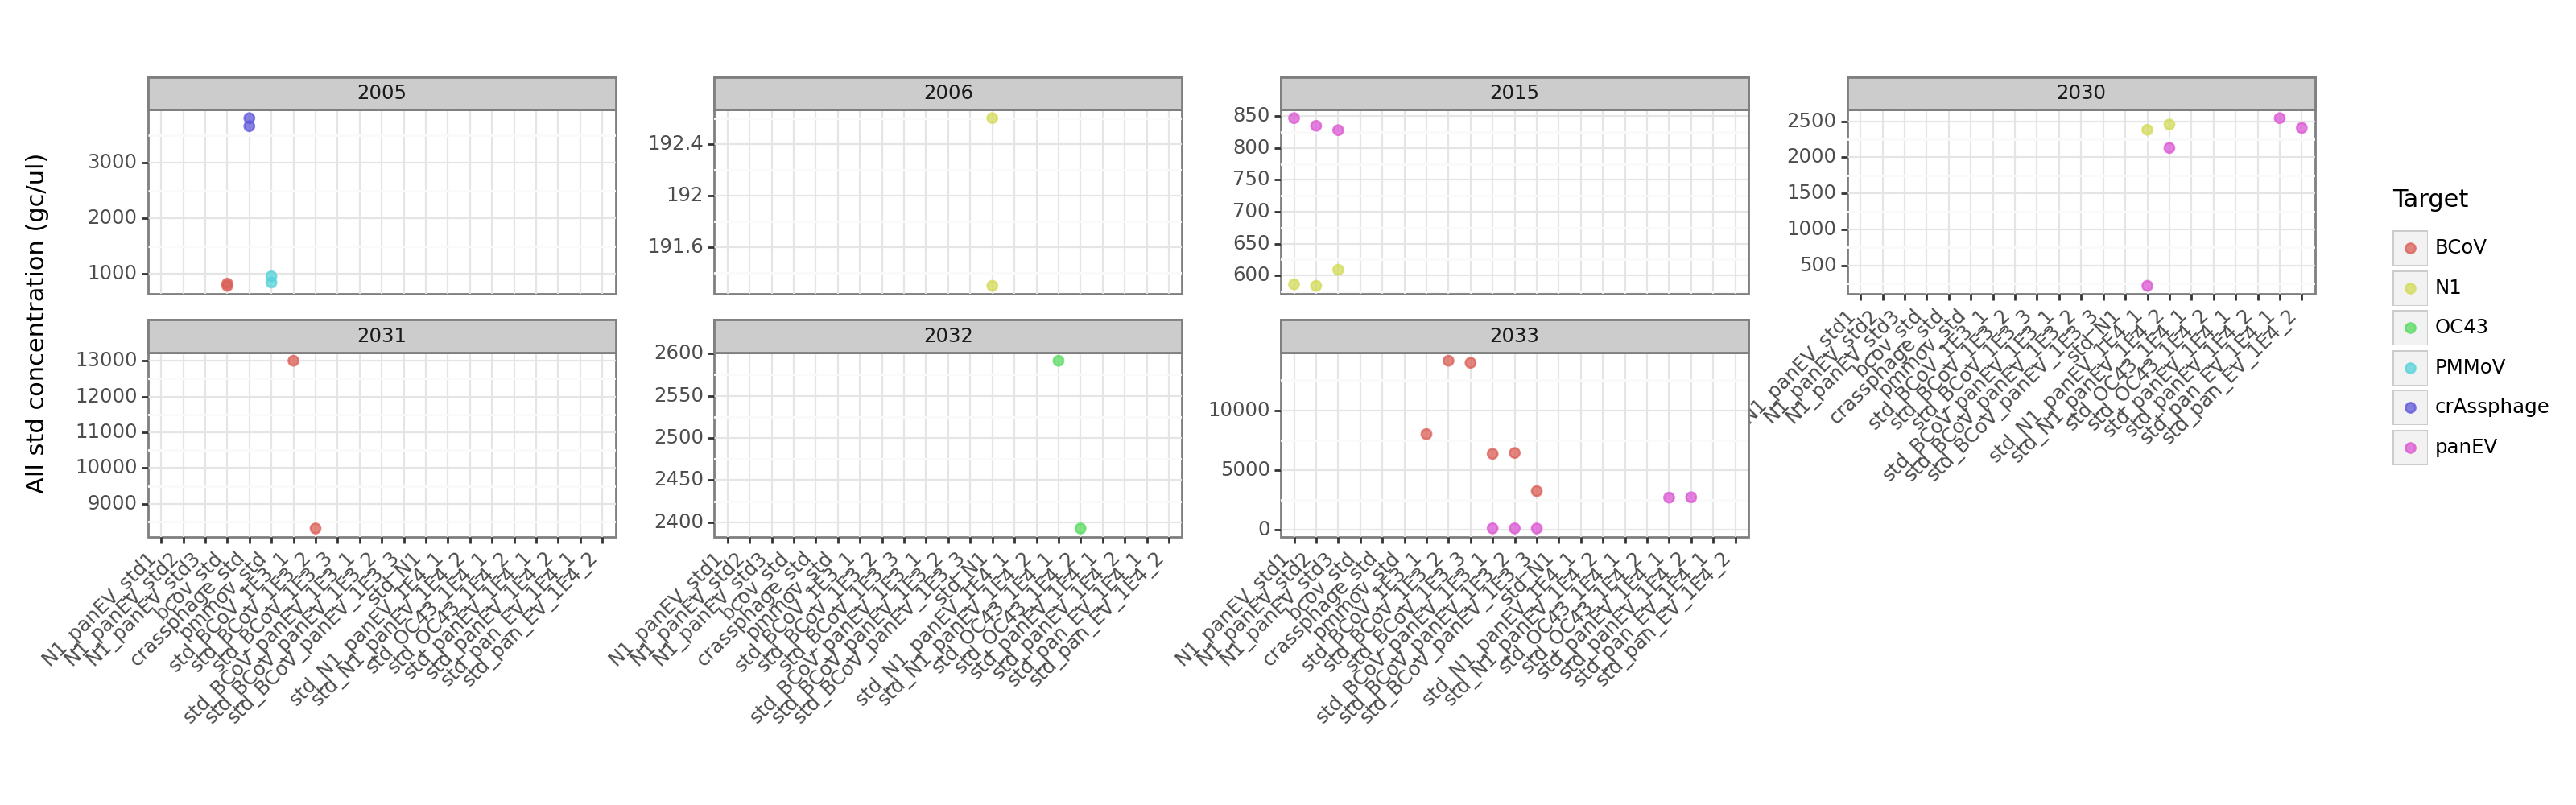

<Figure Size: (1600 x 500)>

In [ ]:
plot = (ggplot(std, aes(x='Sample/NTC/Control', y='Conc. [copies/µL]',color="Target")) +
          geom_point(size=2, alpha=0.75)+
          #geom_line()+
          #geom_errorbar(aes(ymin='ymin', ymax='ymax'),width=0.1, size=0.3, color="black")+ #ymin = mean-SD, ymax= mean+SD, create 2 new columns
          ylab('All std concentration (gc/ul)')+ #specify the y and x-axis labels
          xlab('')+
          #scale_y_continuous(limits=(5000,10000), breaks=range(5000,10000,1000))+
          #scale_y_log10()+
          #geom_vline(xintercept= "2023-02-01", linetype='dashed')+
          theme_bw()+
          facet_wrap('~plate', ncol=4, scales="free_y")+
          #facet_grid("target~Method",scales='free_y') +
          theme(axis_text_x=element_text(rotation=45, hjust=1), subplots_adjust={'wspace': 0.25}, figure_size=(16,5)))
display(plot)
#ggsave(plot, 'N1_panEV_std_NTC.png')

/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


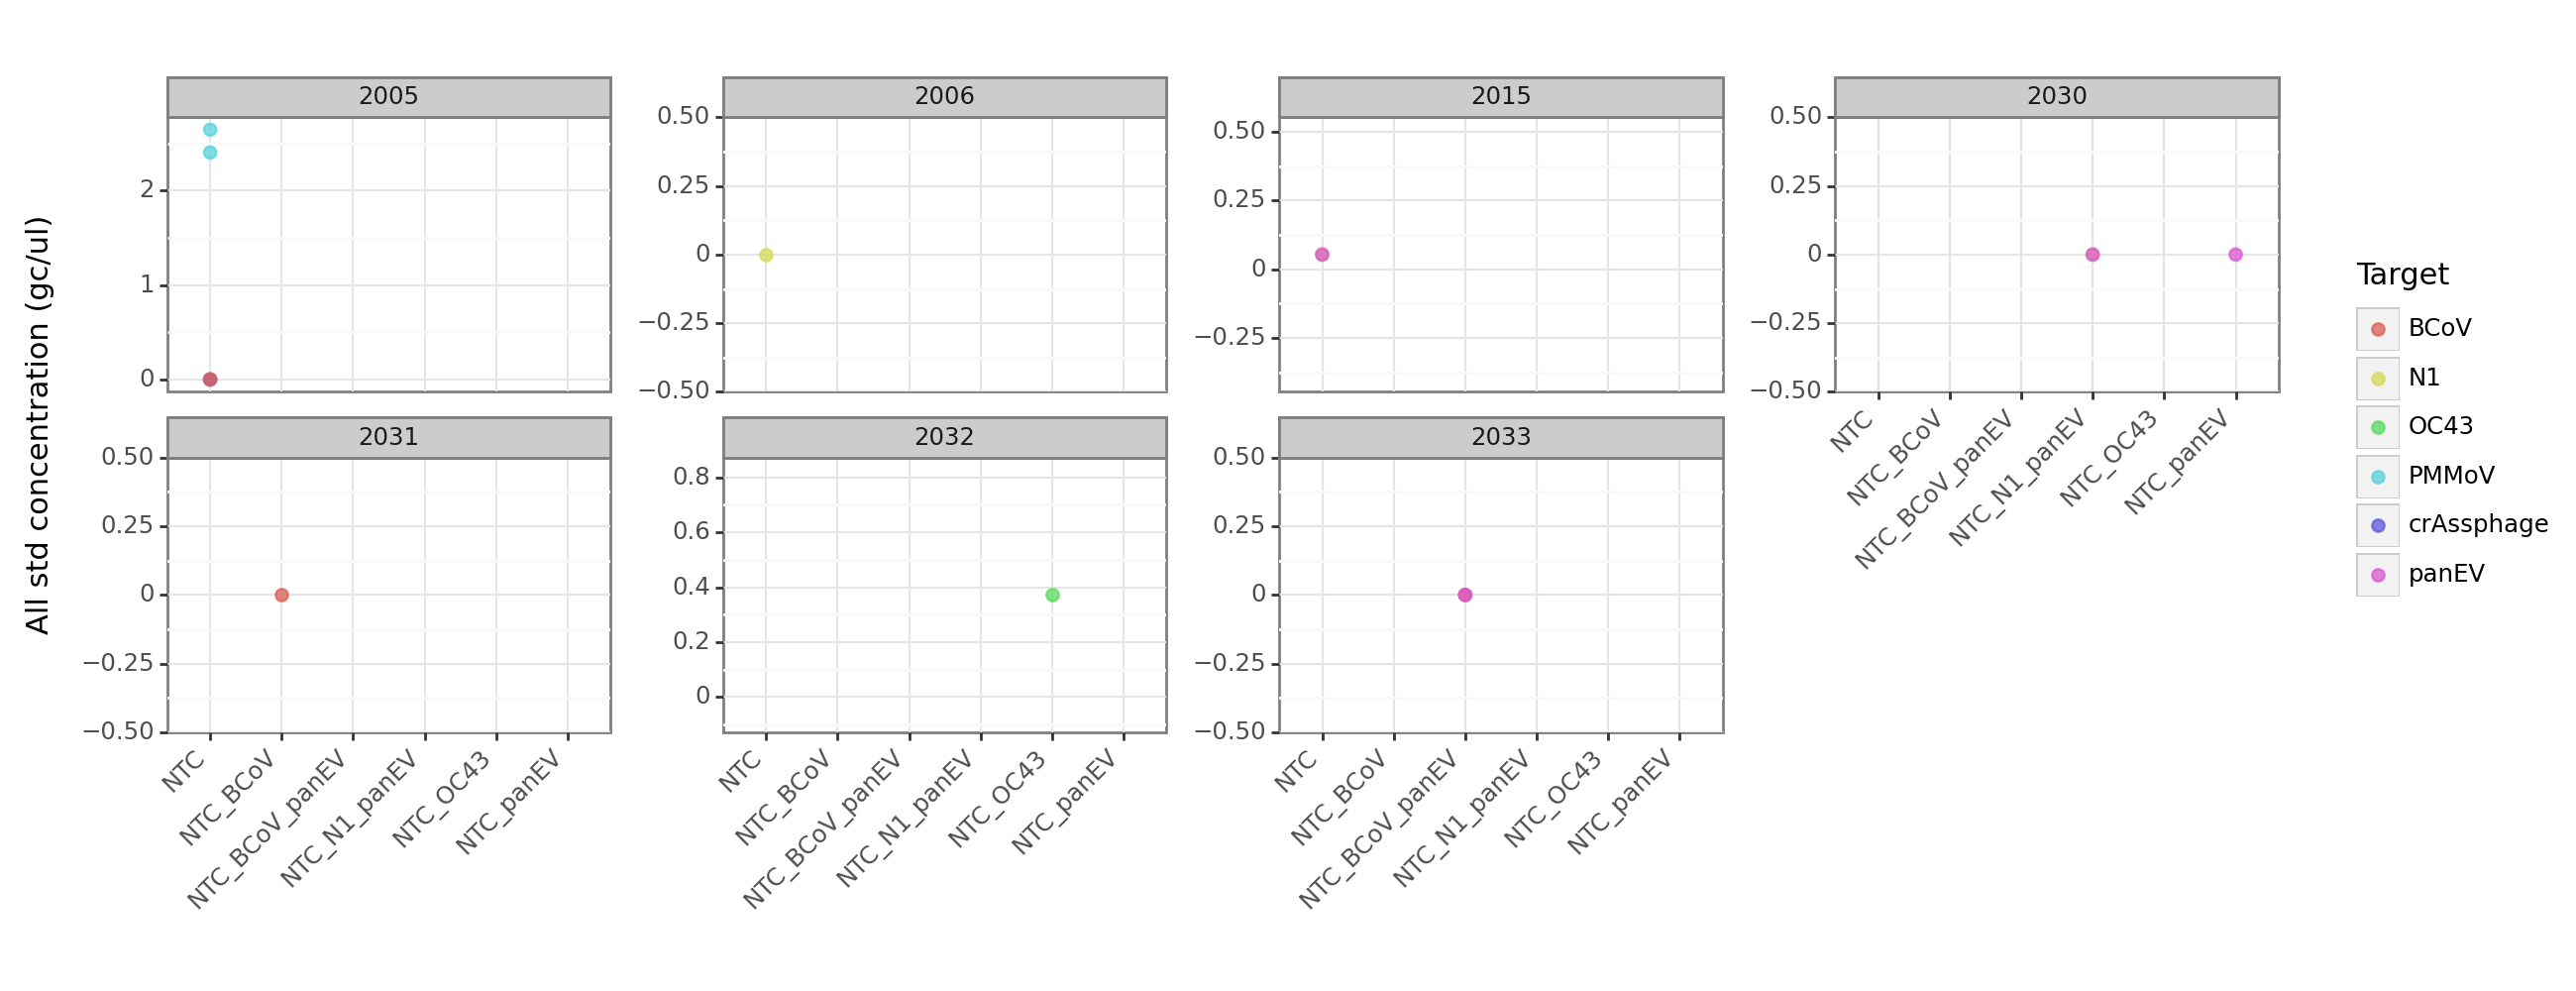

<Figure Size: (1300 x 500)>

In [ ]:
plot = (ggplot(NTC, aes(x='Sample/NTC/Control', y='Conc. [copies/µL]',color="Target")) +
          geom_point(size=2, alpha=0.75)+
          #geom_line()+
          #geom_errorbar(aes(ymin='ymin', ymax='ymax'),width=0.1, size=0.3, color="black")+ #ymin = mean-SD, ymax= mean+SD, create 2 new columns
          ylab('All std concentration (gc/ul)')+ #specify the y and x-axis labels
          xlab('')+
          #scale_y_continuous(limits=(5000,10000), breaks=range(5000,10000,1000))+
          #scale_y_log10()+
          #geom_vline(xintercept= "2023-02-01", linetype='dashed')+
          theme_bw()+
          facet_wrap('~plate', ncol=4, scales="free_y")+
          #facet_grid("target~Method",scales='free_y') +
          theme(axis_text_x=element_text(rotation=45, hjust=1), subplots_adjust={'wspace': 0.25}, figure_size=(13,5)))
display(plot)
#ggsave(plot, 'N1_panEV_std_NTC.png')

In [ ]:
# Extract all samples
samples = combined[~combined['Sample/NTC/Control'].str.contains('std|NTC|PBS|Extracted|heated')]
#print(samples["Sample/NTC/Control"].unique())
#samples['Target'] = samples['Target'].str.replace('pan_EV', 'panEV')
samples[['method', 'date', 'replicates']] = samples['Sample/NTC/Control'].str.split('_', expand=True)
samples['Conc. [copies/µL]'] = samples['Conc. [copies/µL]'].replace('n.a.', float('nan'))
samples['Conc. [copies/µL]']=samples['Conc. [copies/µL]'].astype(float)
samples=samples[samples['positive_rate (%)']<80]

In [ ]:
# Calculate the total gc in final extracted TNA
samples["Totalgc_in_TNA"]=samples['Conc. [copies/µL]']*4*100

,Unnamed: 0,Sample/NTC/Control,Reaction Mix,Target,IC,Control type,Conc. [copies/µL],CI (95%),Partitions (valid),Partitions (positive),Partitions (negative),Threshold,plate,positive_rate (%),method,date,replicates,Totalgc_in_TNA
0,A1,PMG_301_1,BCoV,BCoV,-,-,898.10,4.0%,8145,2080,6065,26.78,2005,25.537139,PMG,301,1,359240.0
1,A2,IP_301_1,BCoV,BCoV,-,-,346.30,6.5%,8258,871,7387,26.78,2005,10.547348,IP,301,1,138520.0
2,A3,PMG_301_1,PMMoV,PMMoV,-,-,42.75,18.5%,8220,112,8108,12.32,2005,1.362530,PMG,301,1,17100.0
3,A4,IP_301_1,PMMoV,PMMoV,-,-,465.10,5.6%,8238,1140,7098,12.32,2005,13.838310,IP,301,1,186040.0
4,A5,PMG_301_1,crAssphage,crAssphage,-,-,33.10,21.1%,8246,87,8159,38.25,2005,1.055057,PMG,301,1,13240.0


/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


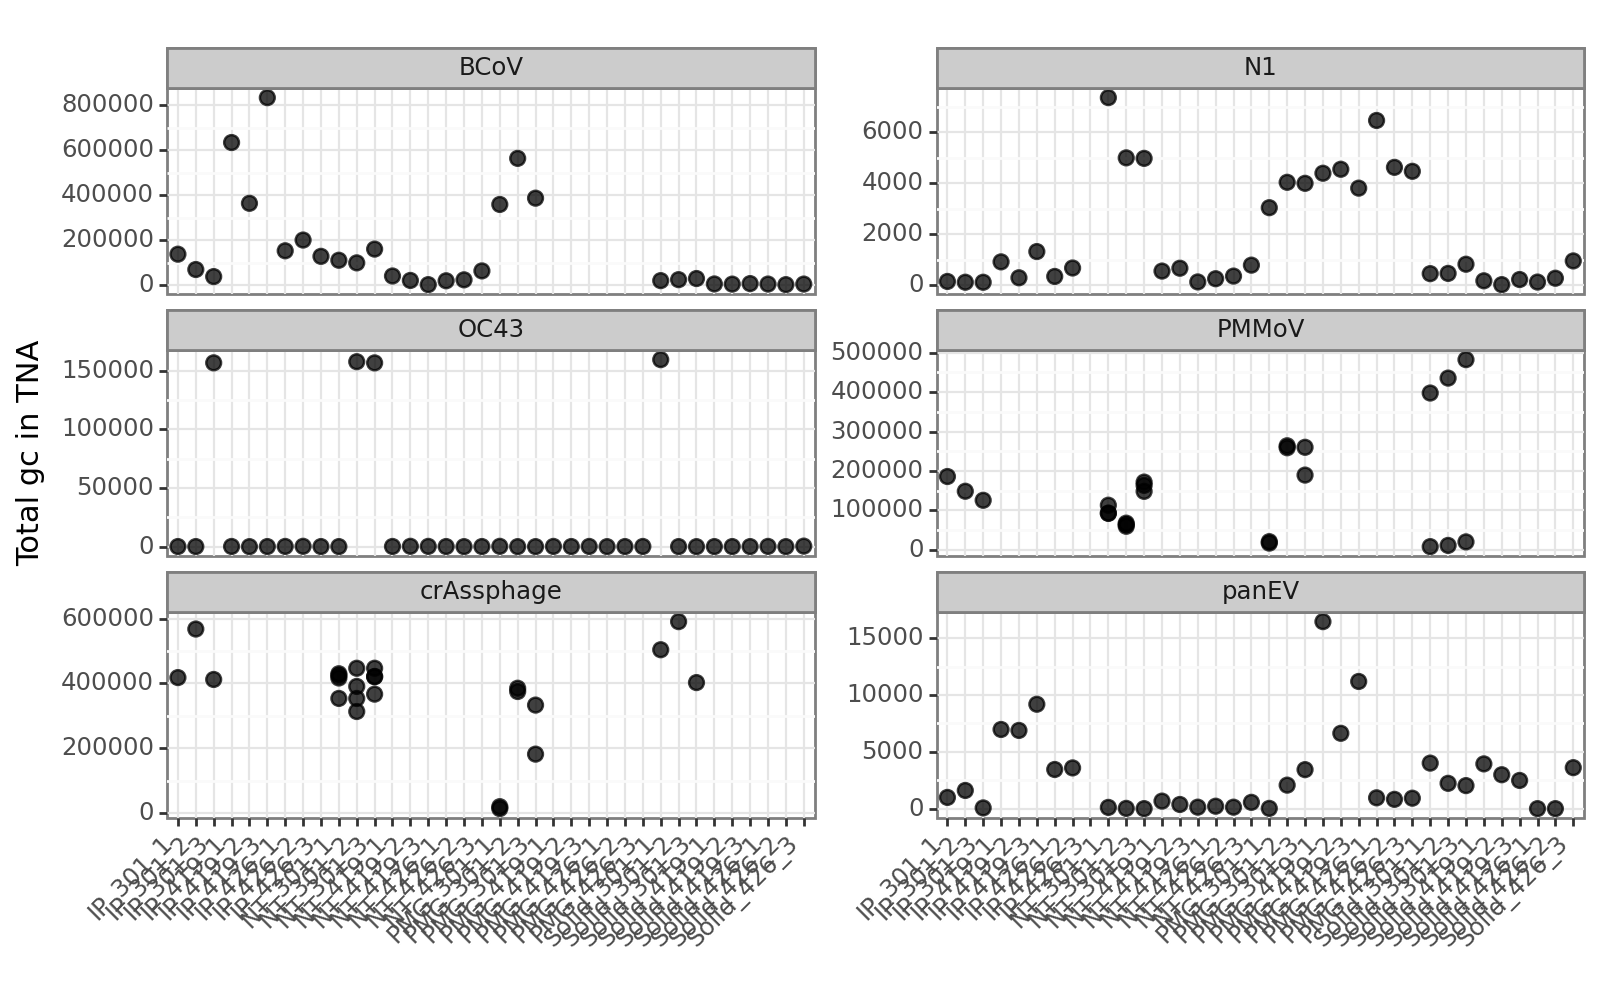

<Figure Size: (800 x 500)>

In [ ]:
plot = (ggplot(samples, aes(x='Sample/NTC/Control', y='Totalgc_in_TNA')) +
          geom_point(size=2.5, alpha=0.75)+
          #geom_line()+
          #geom_errorbar(aes(ymin='ymin', ymax='ymax'),width=0.1, size=0.3, color="black")+ #ymin = mean-SD, ymax= mean+SD, create 2 new columns
          ylab('Total gc in TNA')+ #specify the y and x-axis labels
          xlab('')+
          #scale_y_continuous(limits=(5000,10000), breaks=range(5000,10000,1000))+
          #scale_y_log10()+
          #geom_vline(xintercept= "2023-02-01", linetype='dashed')+
          theme_bw()+
          facet_wrap('~Target', ncol=2, scales="free_y")+
          #facet_grid("target~Method",scales='free_y') +
          theme(axis_text_x=element_text(rotation=45, hjust=1), subplots_adjust={'wspace': 0.25}, figure_size=(8,5)))
display(plot)
#ggsave(plot, 'N1_panEV_samples.png')

In [ ]:
# Summary the samples by date, method and target, calculate the mean and std of final_conc.
sample_summary = samples.groupby(["date","method","Target"]).aggregate(mean=('final_conc.[gc/ml]', 'mean'), SD = ('final_conc.[gc/ml]', 'std'))
sample_summary = sample_summary.reset_index()
# Add-on the ymin and ymax
sample_summary["ymin"]=sample_summary["mean"]-sample_summary["SD"]
sample_summary["ymax"]=sample_summary["mean"]+sample_summary["SD"]
sample_summary

/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


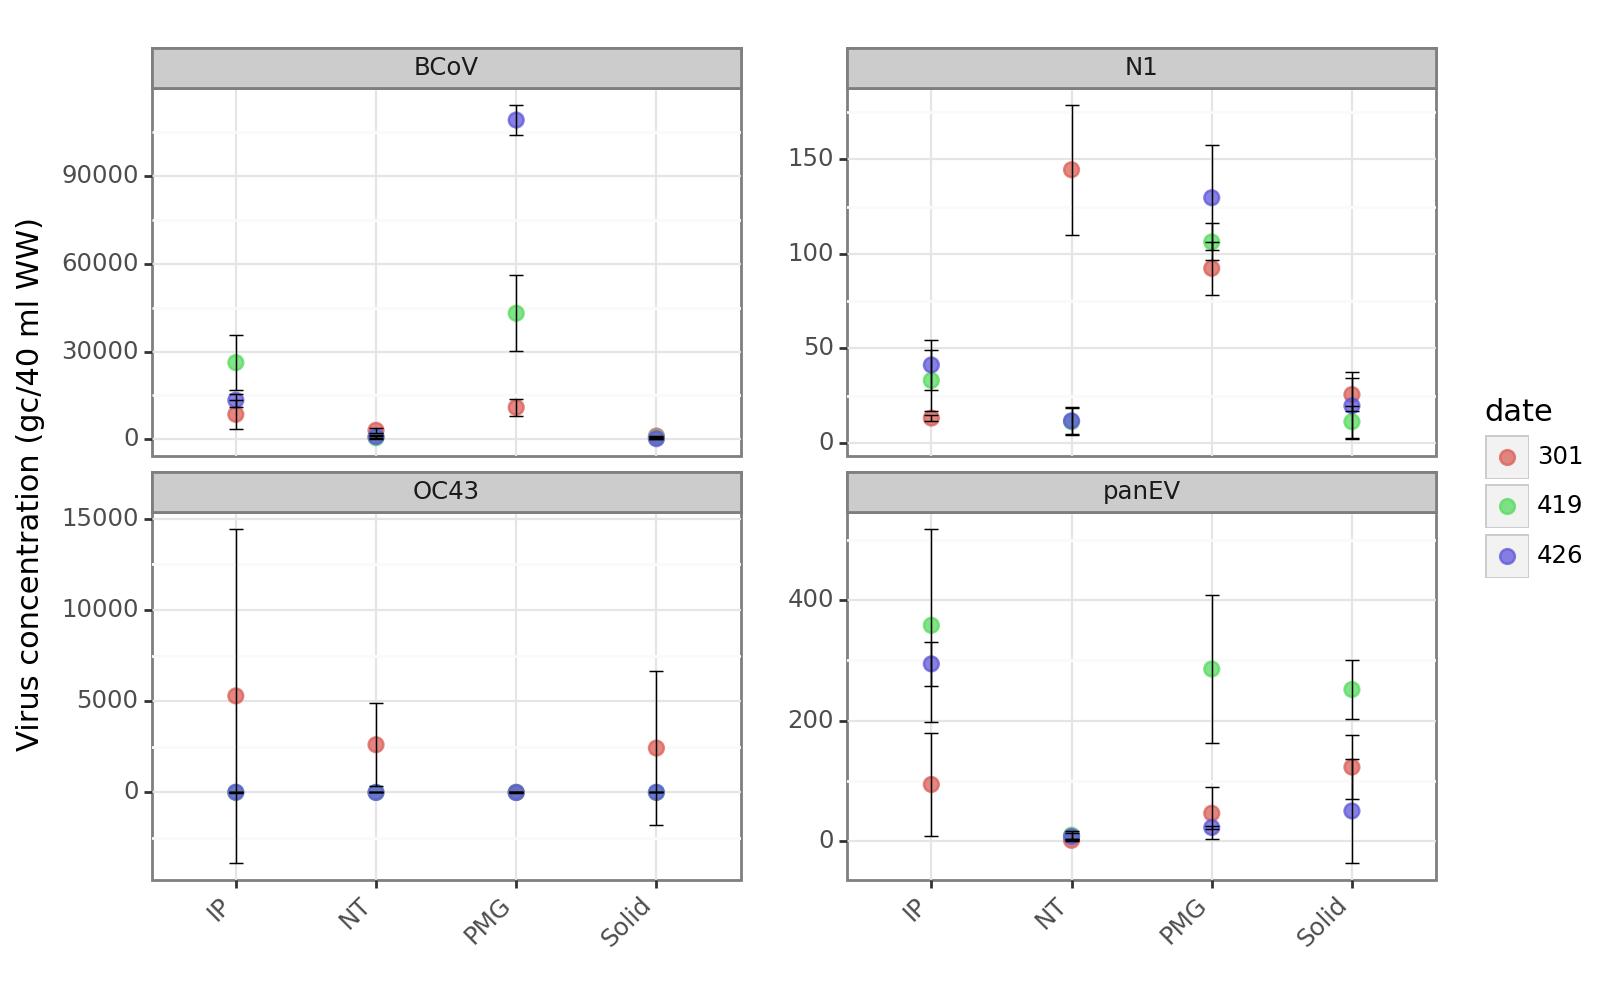

<Figure Size: (800 x 500)>

In [ ]:
plot = (ggplot(sample_summary, aes(x='method', y='mean',color="date")) +
          geom_point(size=2.5, alpha=0.75)+
          #geom_line()+
          geom_errorbar(aes(ymin='ymin', ymax='ymax'),width=0.1, size=0.3, color="black")+ #ymin = mean-SD, ymax= mean+SD, create 2 new columns
          ylab('Virus concentration (gc/40 ml WW)')+ #specify the y and x-axis labels
          xlab('')+
          #scale_y_continuous(limits=(5000,10000), breaks=range(5000,10000,1000))+
          #scale_y_log10()+
          #geom_vline(xintercept= "2023-02-01", linetype='dashed')+
          theme_bw()+
          facet_wrap('~Target', ncol=2, scales="free_y")+
          #facet_grid("target~Method",scales='free_y') +
          theme(axis_text_x=element_text(rotation=45, hjust=1), subplots_adjust={'wspace': 0.25}, figure_size=(8,5)))
display(plot)
#ggsave(plot, 'N1_panEV_samples.png')

In [ ]:
# filtered out abnormal samples
filtered = Sample_combined[~((Sample_combined["Target"] == "OC43") & (Sample_combined["Conc. [copies/µL]"] > 100))]
filtered = filtered[~((filtered["Target"] == "BCoV") & (filtered["Conc. [copies/µL]"] > 10000))]
filtered.head()
filter_summary = filtered.groupby(["date","method","Target"]).aggregate(mean=('final_conc.[gc/ml]', 'mean'), SD = ('final_conc.[gc/ml]', 'std'))
filter_summary = filter_summary.reset_index()
filter_summary["ymin"]=filter_summary["mean"]-filter_summary["SD"]
filter_summary["ymax"]=filter_summary["mean"]+filter_summary["SD"]

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_errorbar : Removed 2 rows containing missing values.
/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


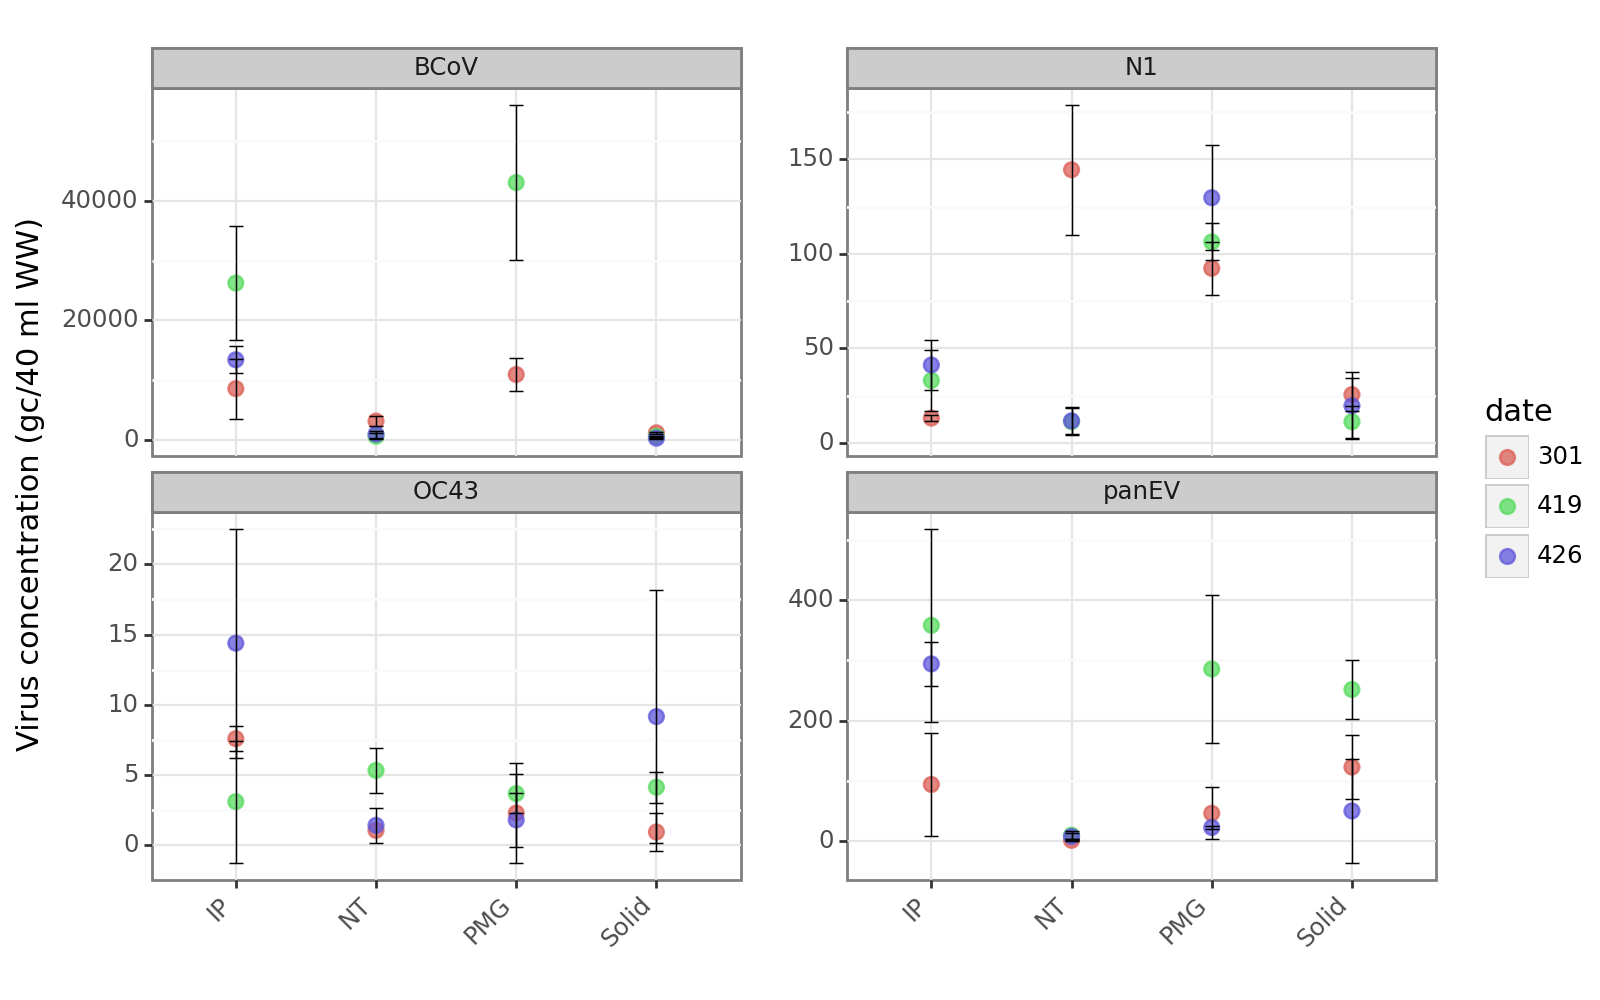

<Figure Size: (800 x 500)>

In [ ]:
plot = (ggplot(filter_summary, aes(x='method', y='mean',color="date")) +
          geom_point(size=2.5, alpha=0.75)+
          #geom_line()+
          geom_errorbar(aes(ymin='ymin', ymax='ymax'),width=0.1, size=0.3, color="black")+ #ymin = mean-SD, ymax= mean+SD, create 2 new columns
          ylab('Virus concentration (gc/40 ml WW)')+ #specify the y and x-axis labels
          xlab('')+
          #scale_y_continuous(limits=(5000,10000), breaks=range(5000,10000,1000))+
          #scale_y_log10()+
          #geom_vline(xintercept= "2023-02-01", linetype='dashed')+
          theme_bw()+
          facet_wrap('~Target', ncol=2, scales="free_y")+
          #facet_grid("target~Method",scales='free_y') +
          theme(axis_text_x=element_text(rotation=45, hjust=1), subplots_adjust={'wspace': 0.25}, figure_size=(8,5)))
display(plot)
#ggsave(plot, 'N1_panEV_samples.png')